In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from modules import *

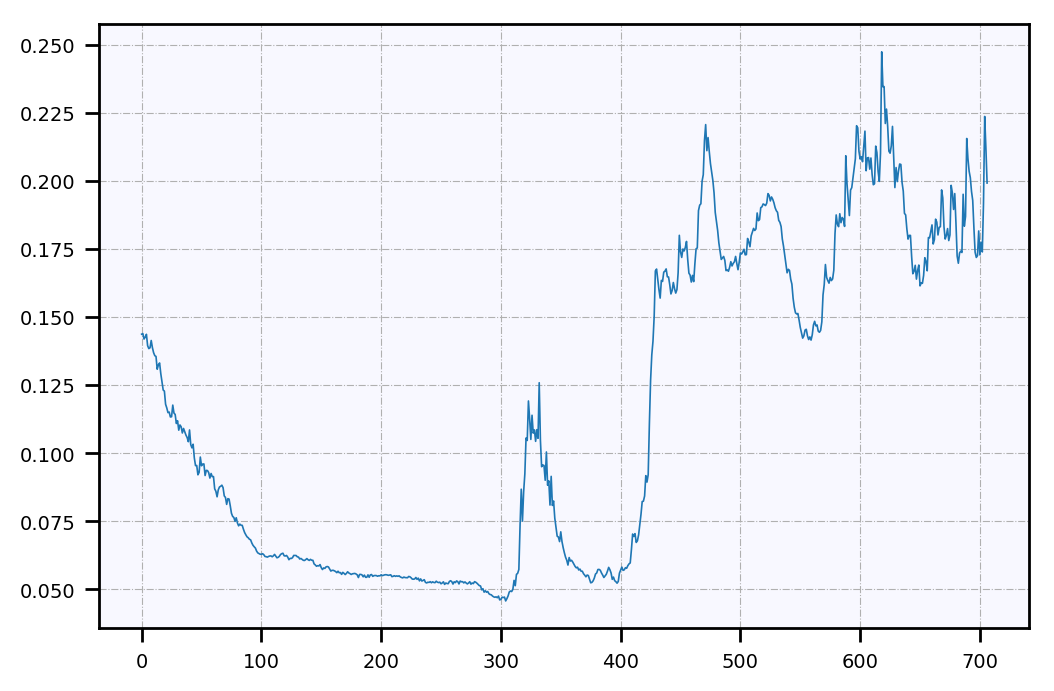

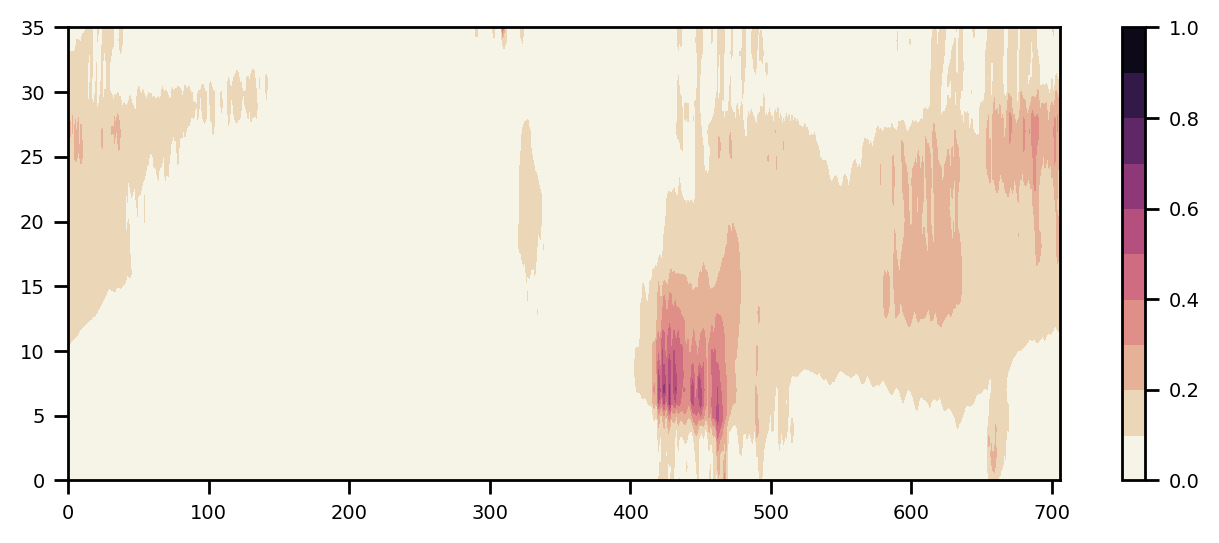

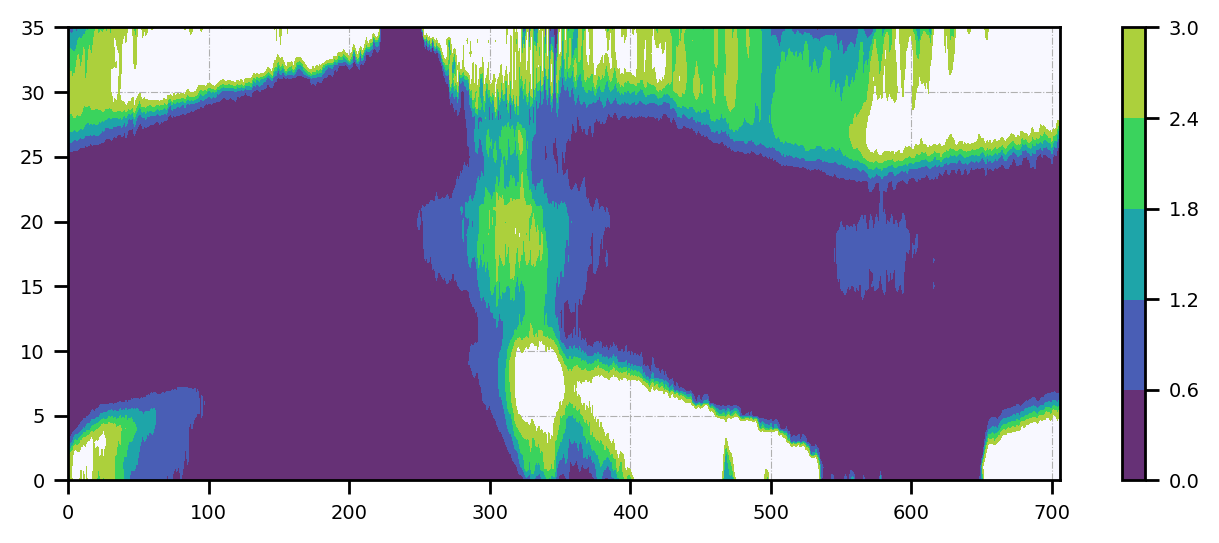

In [46]:
filedir = './wetL50_ld_auxhist9.nc'
data = Dataset(filedir,'r')
ls = data.variables['LS'][:]
tau_od = data.variables['TAU_OD2D_AM'][:]
tau_od_p = data.variables['TAU_OD2D_PM'][:]
tau_cl = data.variables['TAU_CL2D_AM'][:]
tdiff = data.variables['T_PHY_DIFF'][:]
tpm = data.variables['T_PHY_AVG'][:]
data.close()

filedir = './wetL50_ld_wrfout.nc'
data = Dataset(filedir,'r')
ls2 = data.variables['LS'][:]
t = data.variables['T'][:]
p = data.variables['P'][:]
data.close()

figure(3)
plot(tau_od.mean(axis=2).T[18])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
contourf( (tau_od).mean(axis=2).T, np.linspace(0,1,11), cmap=cb2)
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
contourf( tau_cl[:].mean(axis=2).T, np.linspace(0,3,6), cmap=cb)
colorbar()

p = martians_year(ls2, p)
t = martians_year(ls2, t)
ls2 = martians_year(ls2, ls2)
p = martians_month(ls2, p)

tdiff = martians_year(ls, tdiff)
tau_od = martians_year(ls, tau_od)
tau_od_p = martians_year(ls, tau_od_p)
tau_cl = martians_year(ls, tau_cl)
ls = martians_year(ls, ls)


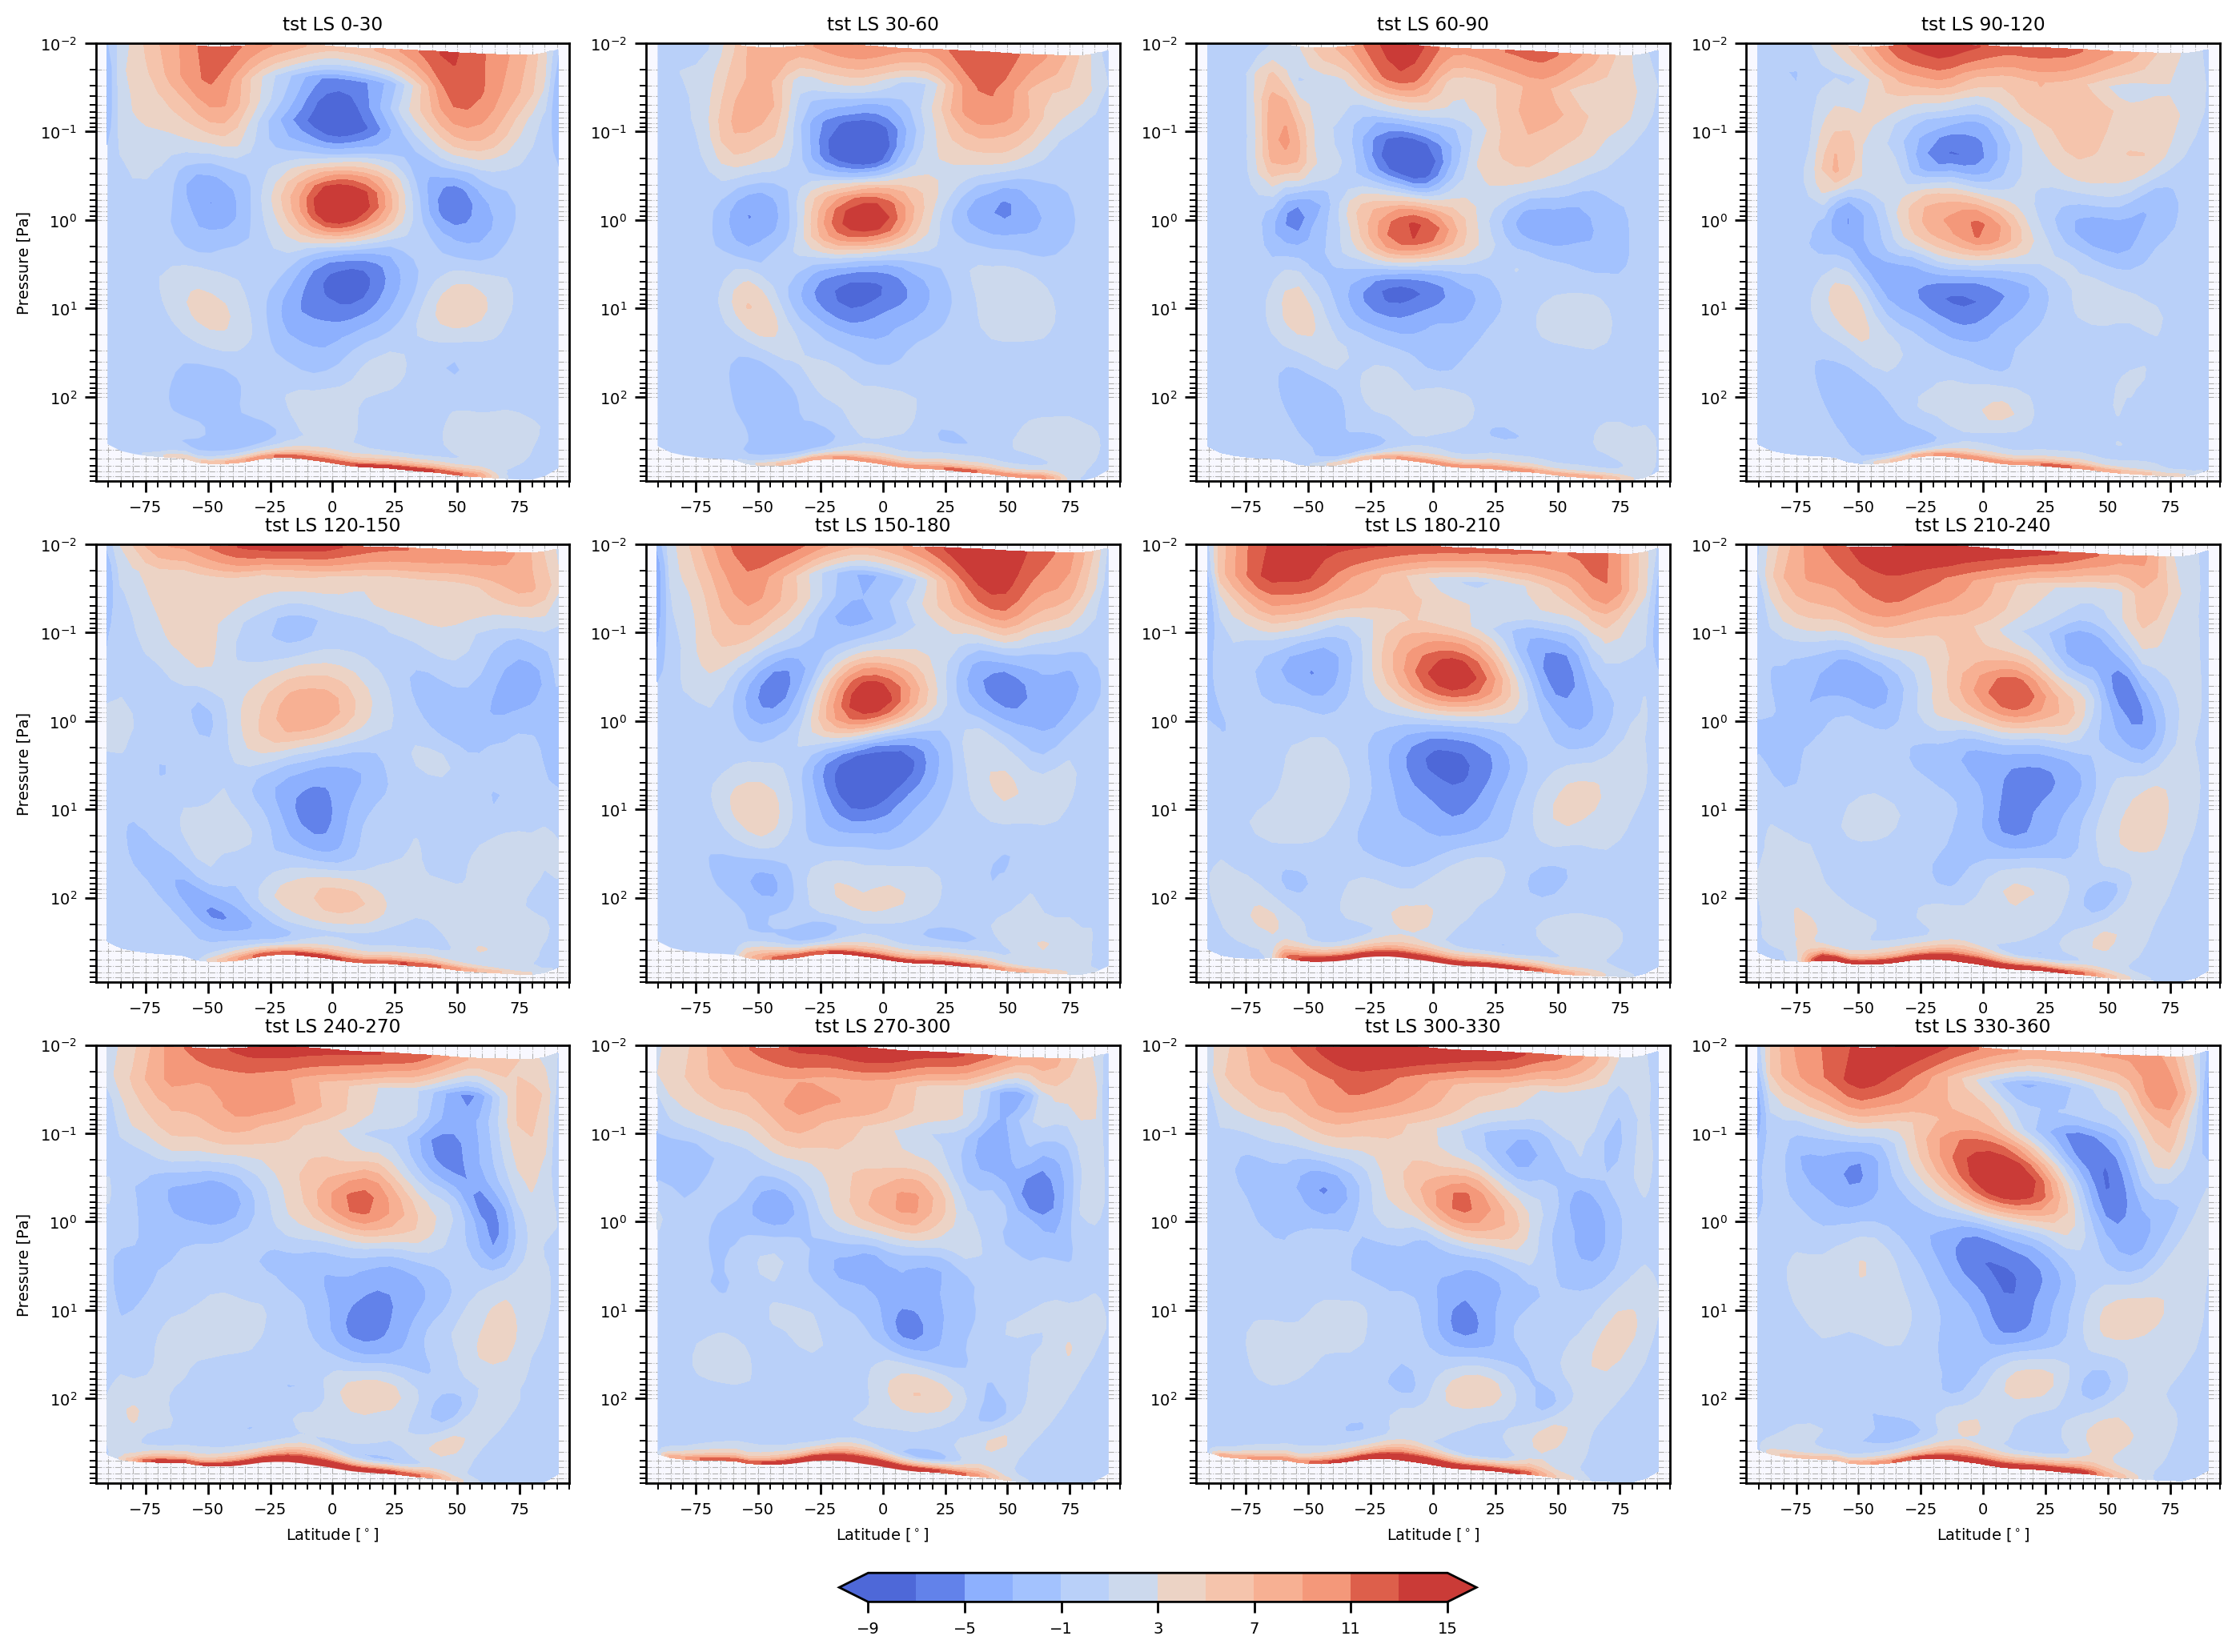

In [47]:
tdiff = martians_month(ls, tdiff)

zonal_plt_monthly(p, ls, tdiff, 'tst', level=np.linspace(-9,15,13), norm=False, cmap=cmap)

In [ ]:
plot(ls2, t[:,25:30,17:20].mean(axis=2).mean(axis=1))

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
    
T2km_filter_waven("./wetL45")

4it [00:28,  7.08s/it]


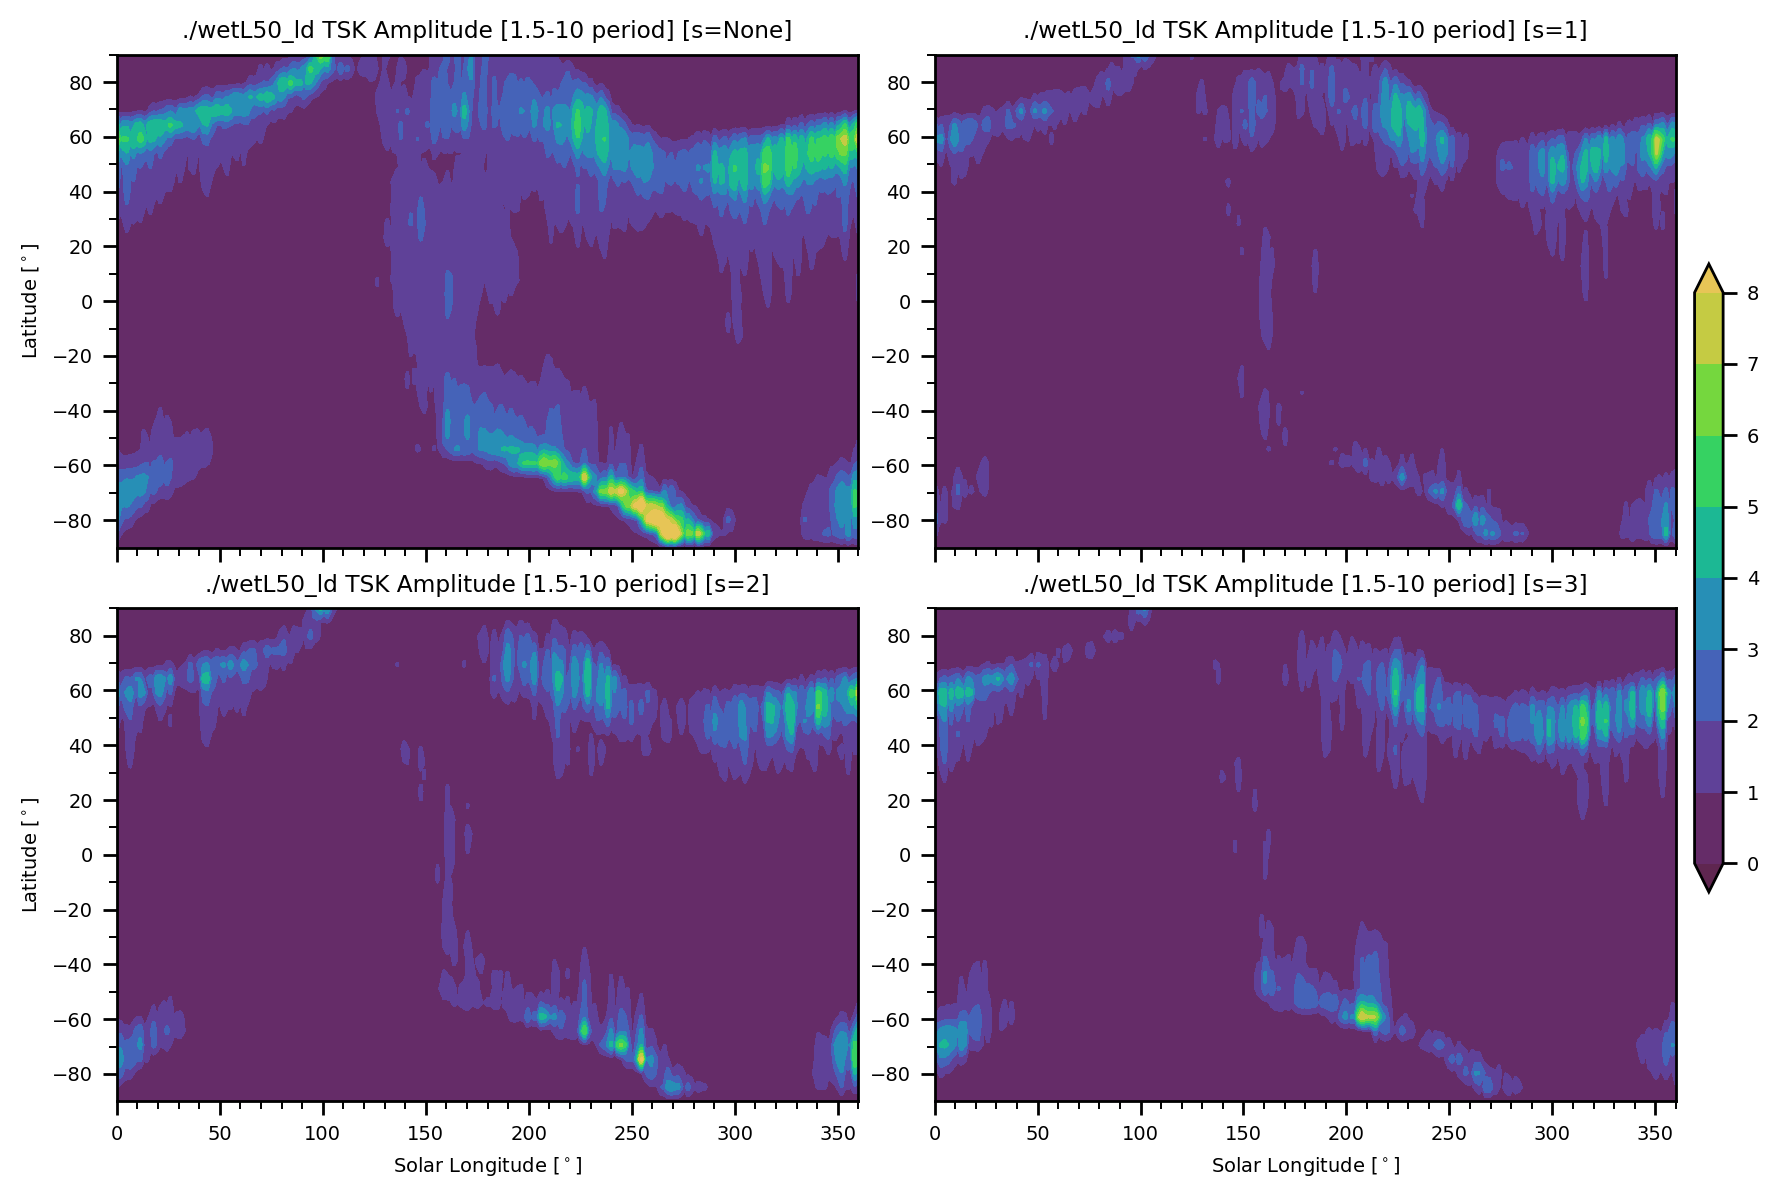

In [64]:
T2km_filter_waven("./wetL50_ld")

100%|██████████| 52/52 [00:20<00:00,  1.98it/s]


(52, 5273, 14)


/home/vsok/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


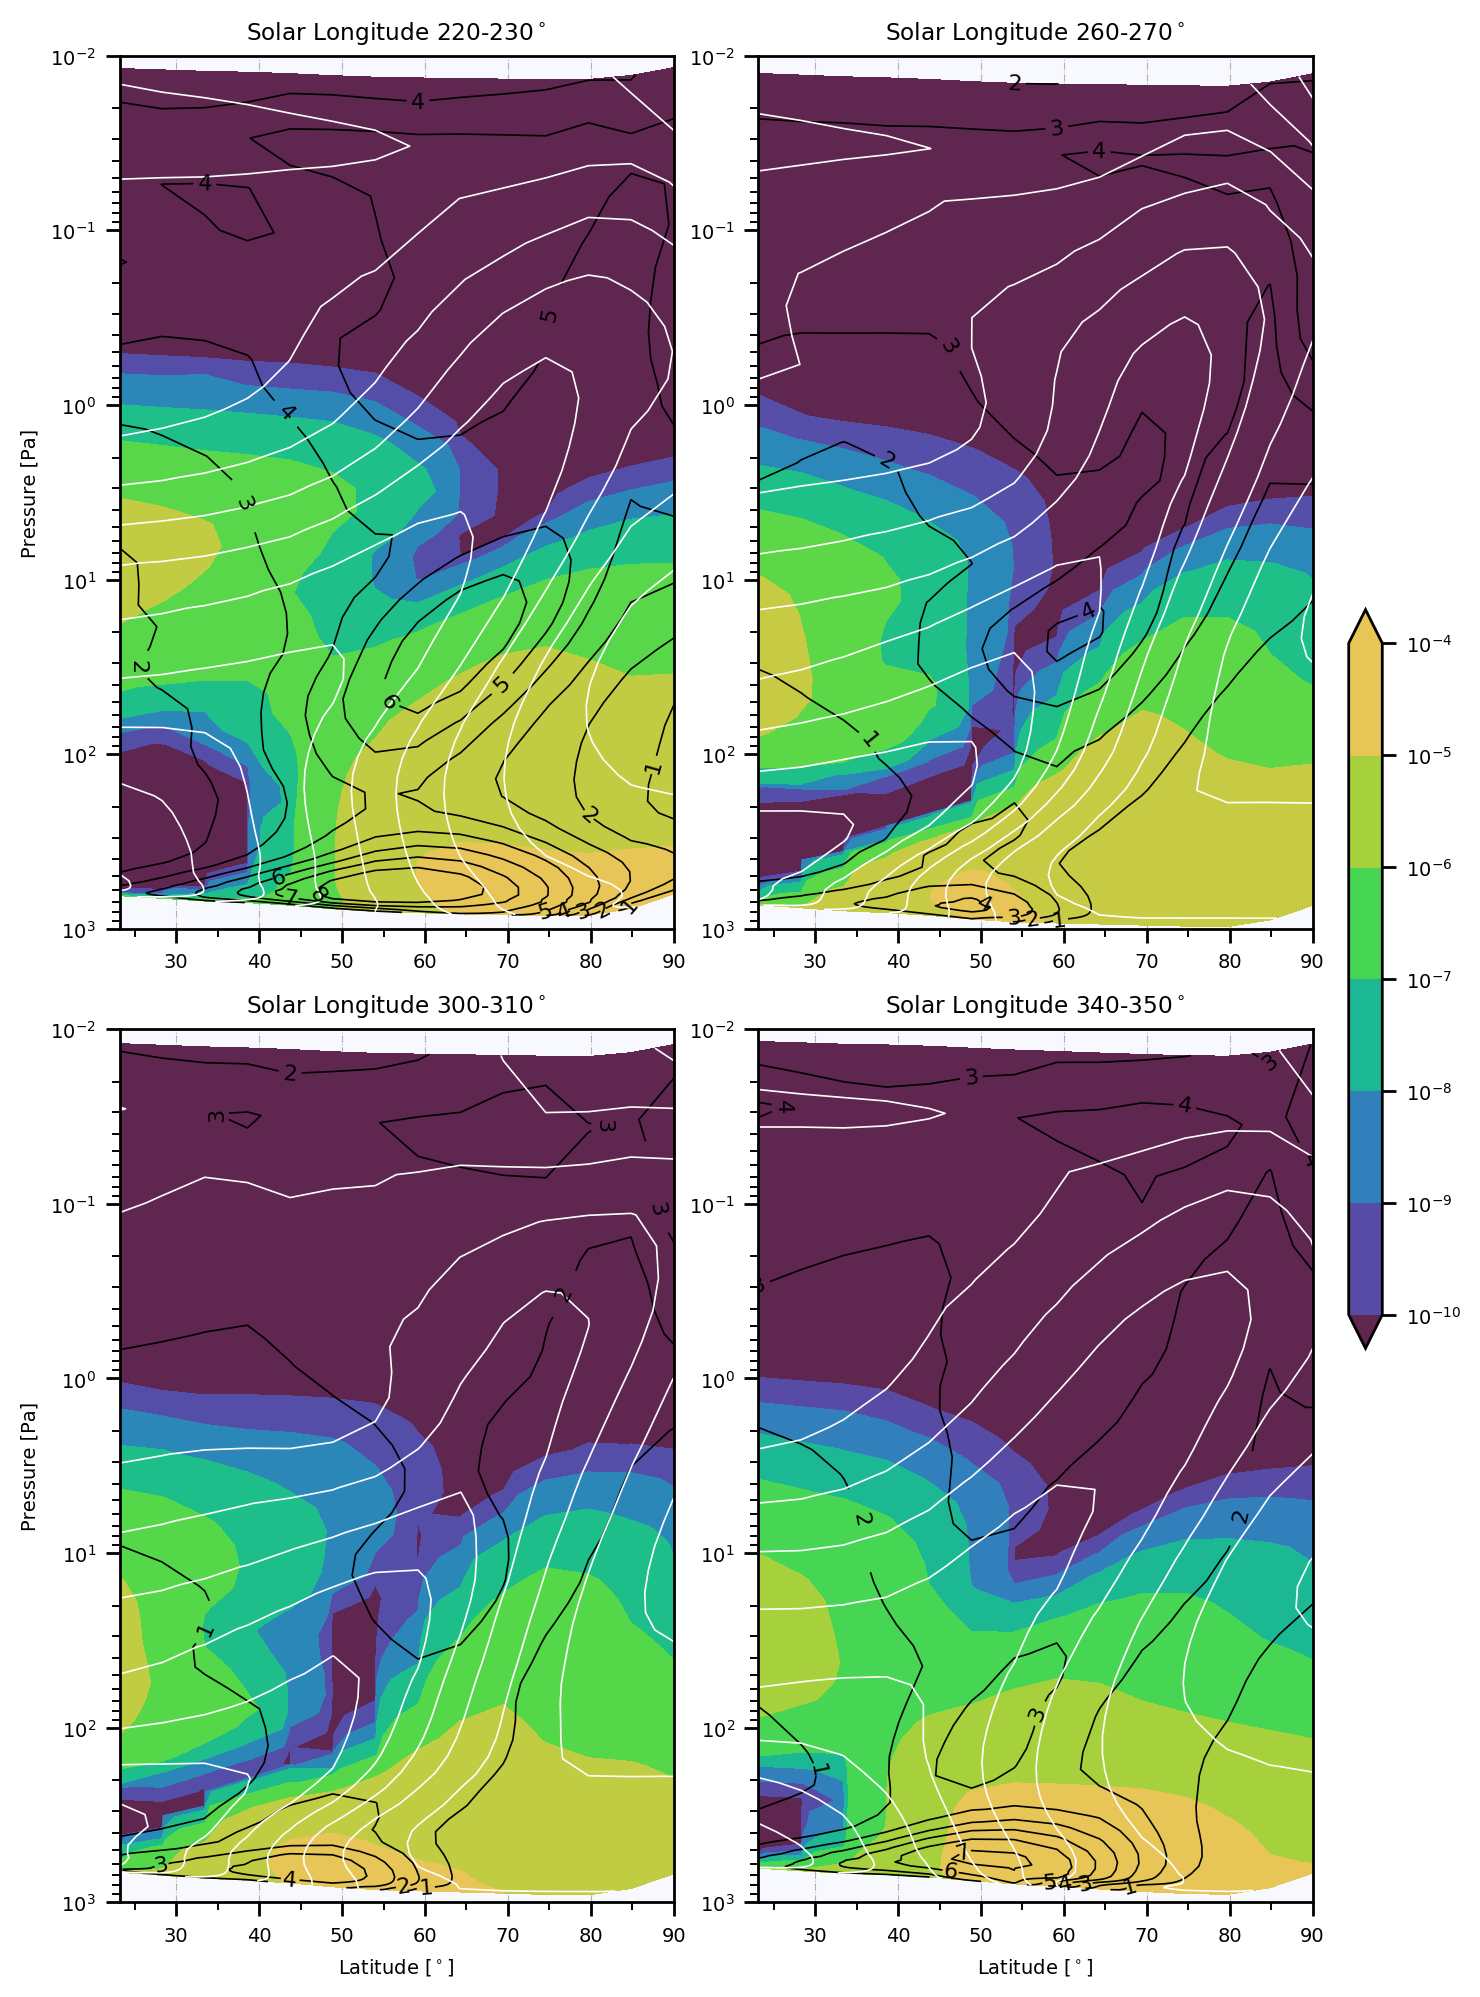

In [77]:
bandpass_filter('./r14p1_partial.nc')

100%|██████████| 52/52 [00:19<00:00,  2.20it/s]


(52, 5273, 14)


/home/vsok/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


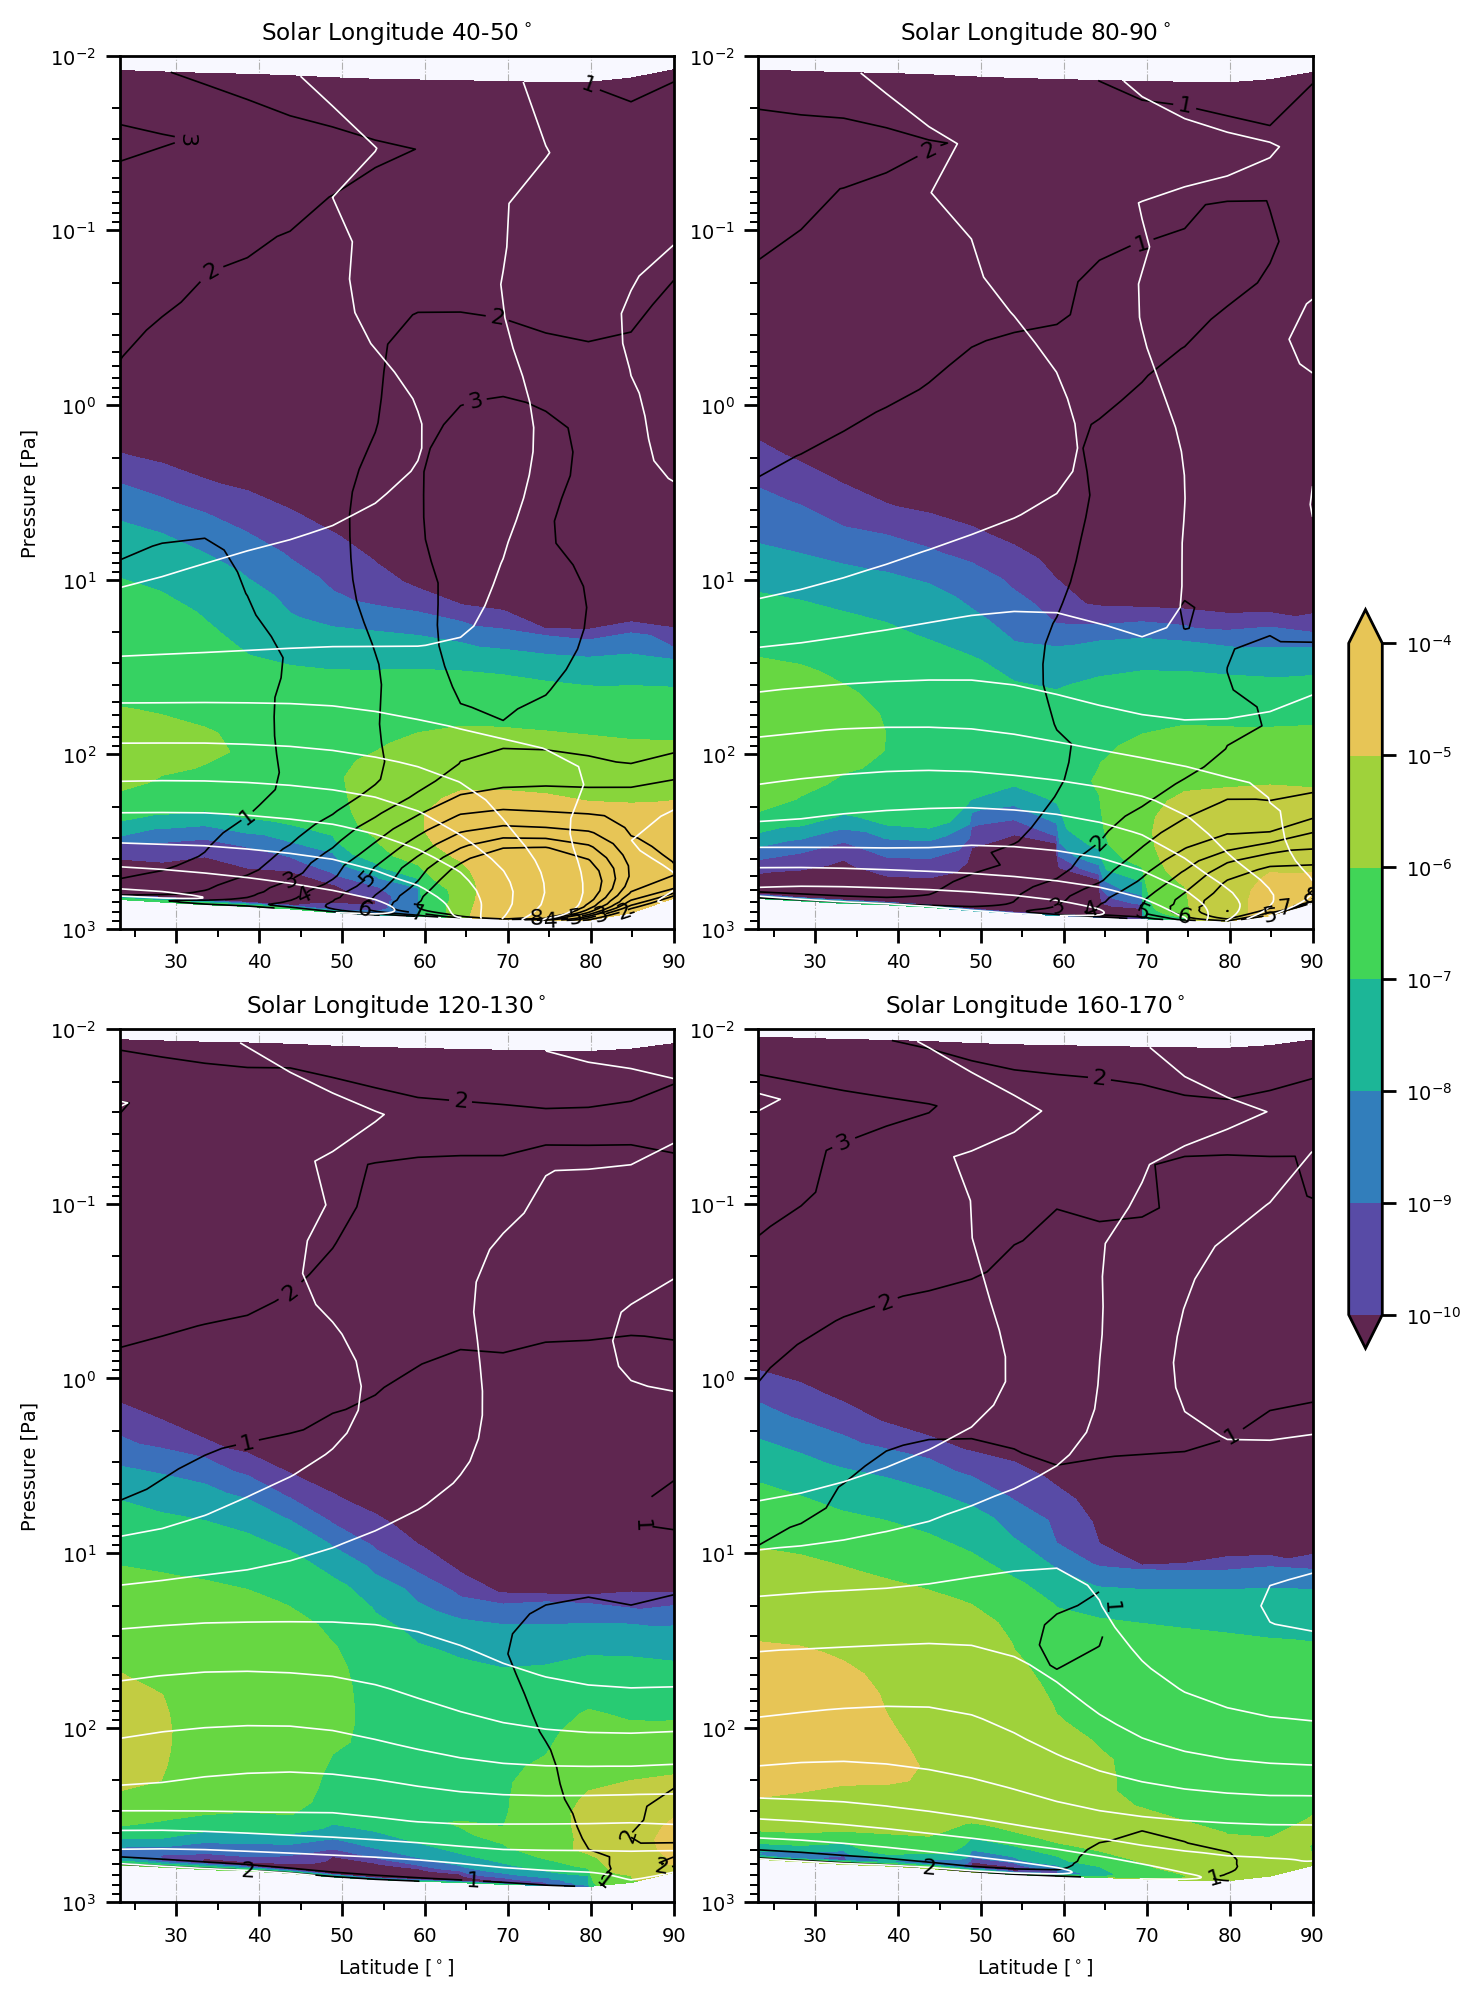

In [76]:
bandpass_filter('./r14p1_partial.nc')

In [45]:
data = Dataset('./r14p1_partial.nc','r')
qi = data.variables['QICE'][:]
qv = data.variables['QVAPOR'][:]
qd = data.variables['TRC01'][:]
ls = data.variables['LS'][:]
data.close()

qi = martians_year(ls, qi)
qv = martians_year(ls, qv)
qd = martians_year(ls, qd)
ls = martians_year(ls, ls)

qi = martians_month(ls, qi)
qv = martians_month(ls, qv)
qd = martians_month(ls, qd)

In [37]:
qi.shape

(12, 52, 10, 72)

TypeError: Input must be a 2D array.

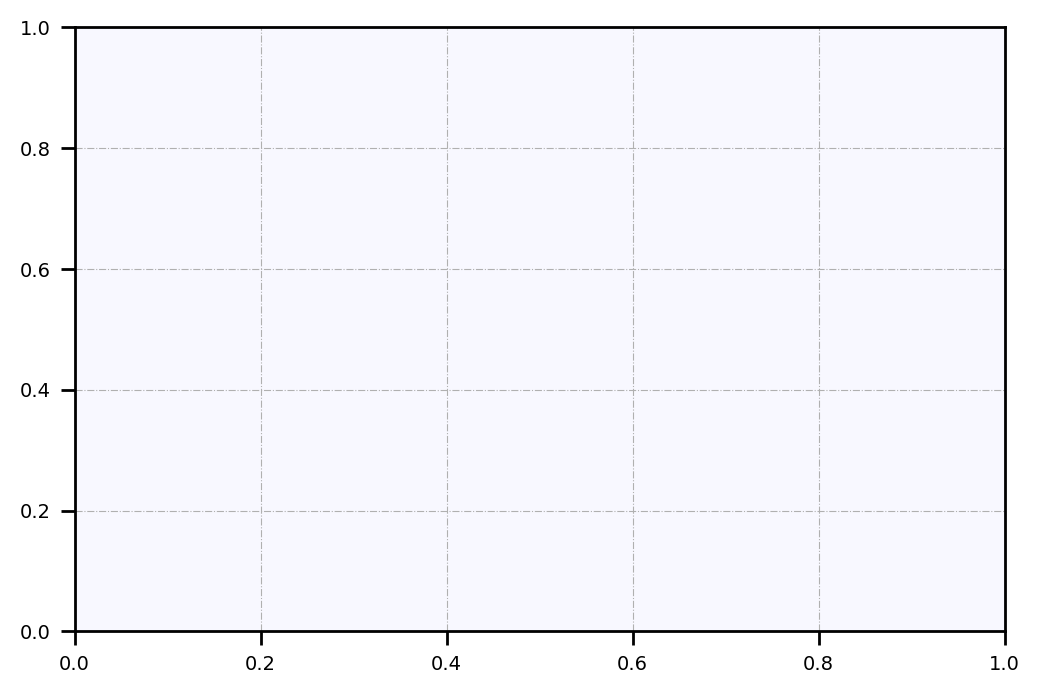

In [35]:
import matplotlib.pyplot as plt
contourf(qi[2])
colorbar()